All explanations for code cells are written above the code cells.

# Using `numpy`

## Importing `numpy` library

In [30]:
import numpy as np

## Creating Matrices

- A 3 by 3 matrix is created

In [31]:
x = np.array([[1, 2, 3],
			[4, 5, 6]])

In [32]:
print(x)

[[1 2 3]
 [4 5 6]]


# Using `matplotlib`

- `%matplotlib inline` is a magic function
- Allows for inline plotting of graphs (bellow the cells)

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

- Creates an array for 20 elements from 0 to 19
- Similar to a list comprehension

In [34]:
x = np.arange(20)

In [35]:
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


- Checks if the a list comprehension is the same as the `x` that was generated

In [36]:
print([x for x in range(20)] in x)

True


---

- For each value of `x`, it computes `sin(x)` 
- Each value of `sin(x)` is added into the array `y`
- Radians is the units used

In [37]:
y = np.sin(x)

In [38]:
print(y)

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021
 -0.53657292  0.42016704  0.99060736  0.65028784 -0.28790332 -0.96139749
 -0.75098725  0.14987721]


## Plotting

- `marker` is used to specify what sign is used to mark the coordinates
- There are several markers that can be used specified in the [documentation](https://matplotlib.org/stable/api/markers_api.html#:~:text=All%20possible%20markers%20are%20defined%20here%3A)

- Plotting `x` should return a straight like graph
- Circles are the markers used

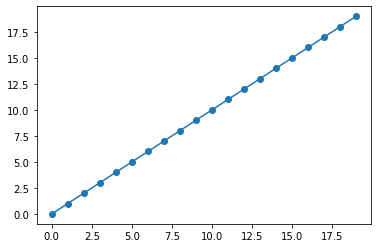

In [39]:
plt.plot(x, marker = "o")

- Plotting `y` returns the points for each value of `sin(x)`
- Crosses are the markers used

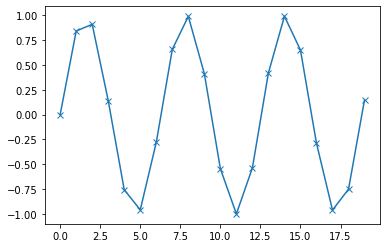

In [40]:
plt.plot(y, marker = "x")

- Why does reversing `x` and `y` change the graph?
- The same graph is returned but transformed?

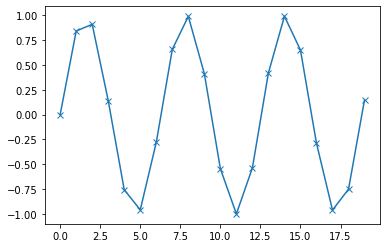

In [41]:
plt.plot(x, y, marker = "x")

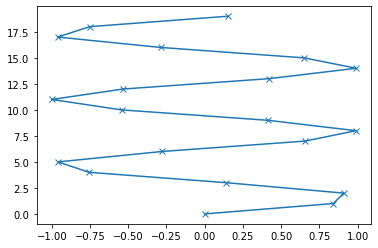

In [42]:
plt.plot(y, x, marker = "x")

# Experiments with `iris`
In this part we will go through a simple machine learning application and create our first model. A hobby botanist would like to tell the species of iris flowers that she found. She has a training set of labelled flowers. The features are the length and width of the petals, and the length and width of the sepal, all measured in centimeters. 

There are three possible labels (species): Setosa, Versicolor, or Virginica. The iris dataset is a classical dataset in machine learning and statistics, collected by Ronald A. Fisher. It is included in scikit-learn in the dataset module. 

- The `iris` dataset is a precompiled dataset 

In [43]:
from sklearn.datasets import load_iris
from sklearn.utils import Bunch # For type hinting iris return type

- Loads the `iris` dataset 
- This can be of the following types `tuple[DataFrame | ndarray, Series | DataFrame | ndarray] | Bunch`
  - It normally returns a `Bunch` which is similar to a `dict`

In [44]:
iris: Bunch = load_iris()

- As mentioned before, iris returns a `Bunch` which is similar to a `dict`
- This means that each key will have some values that it store

In [45]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- Because `iris` is similar to a `dict`, some of the operations from a `dict` can be used
- `iris['DESCR']` finds what is stored in the `DESCR` key

In [46]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- `target_names` is a list of strings containing the labels 
- In this case, it contains the species of flowers that need to be predicted (dependent variable)

In [47]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


- `iris['feature_names']` returns a list of descriptions for each feature

In [48]:
print(iris['feature_names'])
# print(*iris['feature_names'], sep="\n") # Print each element in a new line

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


- `iris['data']` returns the data which is the matrix of features
- `.shape` returns the shape of the matrix which is the dimensions (rows and columns)
  - For this data, the matrix is 150 by 4 meaning there are 150 rows (values) and 4 columns

In [49]:
print(iris['data'].shape) # Dimensions of the matrix
print(iris['data']) # Matrix of features

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

- Using slicing, it is possible to get a range of values (slice) from the data (matrix of features)

In [50]:
print(iris['data'][:5]) # Splice from start of list to 4th index (5 elements)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


- Contains the species of each flower that was measured
  - 0 = Setosa, 1 = Versicolor, 2 = Virginica

In [51]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- Returns the shape of the Numpy array as the dimensions of the matrix
- There are 150 rows similar similar to the number of rows in `iris['data']` 
  - This is because each target applies to the data

In [52]:
print(iris['target'].shape)

(150,)


# Visualizing Data
- It is often a good idea to visualize your data:
  - To see if the task is easily solvable without machine learning
  - Or if the desired information might not be contained in the data
- Computer screens have only two dimensions, which allows us to only plot two (or maybe three) features at a time

- The *Matrix of Features* is usually denoted with `X`
- The *Dependent Variable* vector is denoted with `y`

In [53]:
X: Bunch = iris['data'] # Matrix of Features
y: Bunch = iris['target'] # Dependent Variable Vector

- The axis are `sepal_length` and `petal length`
- `X[:, 0]` denotes 
  - Everything from the start to the end of the Matrix of Features `X`
  - `, 0` serves as proxy for the size of sepals
  - `, 2` serves as proxy for the size of petals
- `c=y` denotes:
  - `c` = colour
  - `y` = vector of labels
- `s=60` denotes the size of the dots

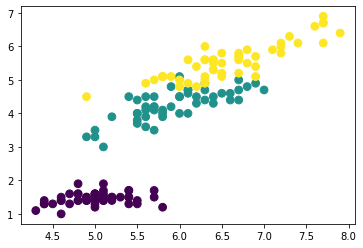

In [54]:
plt.scatter(X[:, 0], X[:, 2], c=y, s=60)

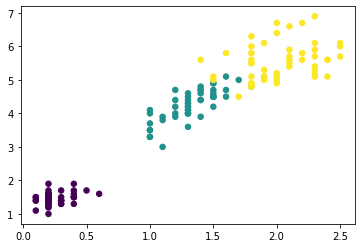

In [55]:
plt.scatter(X[:, 3], X[:, 2], c=y, s=30)

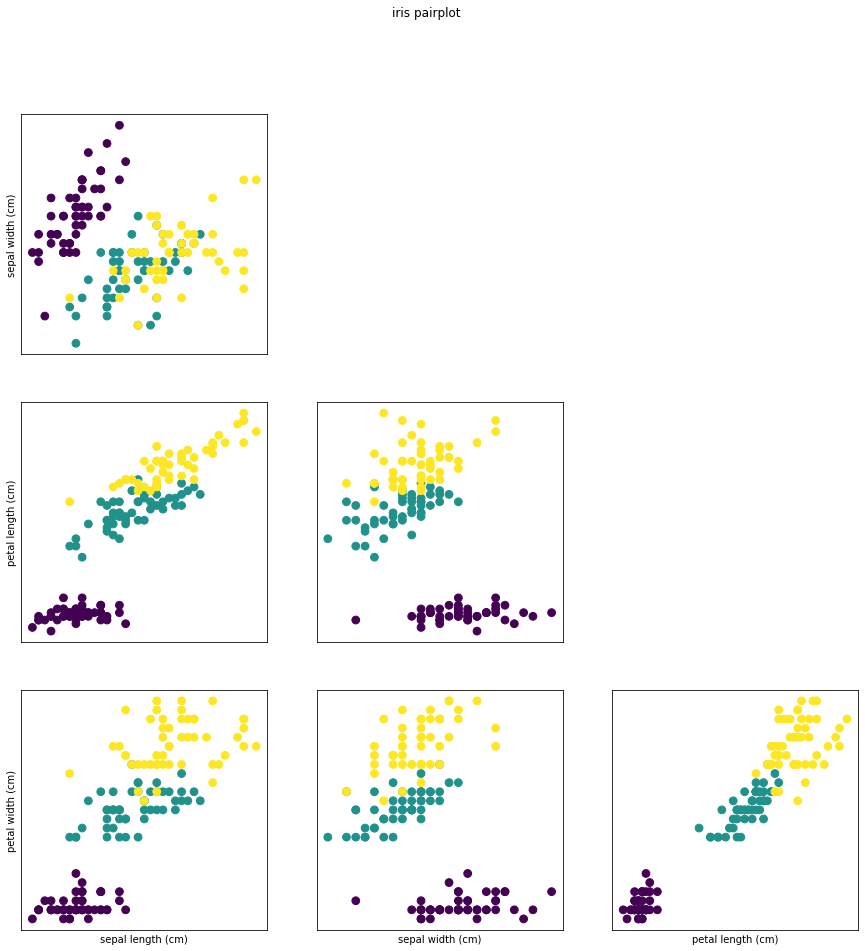

In [56]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris pairplot")

for i in range(3):
	for j in range(3):
		ax[i,j].scatter(X[:,j], X[:,i+1], c=y, s=60) #
		ax[i,j].set_xticks(())
		ax[i,j].set_yticks(())
		if i == 2:
			ax[i,j].set_xlabel(iris['feature_names'][j])
		if j == 0:
			ax[i,j].set_ylabel(iris['feature_names'][i+1])
		if j > i:
			ax[i,j].set_visible(False)
		

In [57]:
print(len(fig.axes)) # Number of axes in the figure
print(len(fig.axes) - len(fig.get_axes())) # Number of invisible axes

9
0
